In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate random linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.ravel() + np.random.randn(100)

X = X.reshape(-1, 1)

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=1e-3, n_iters=1000):
        # init parameters
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0

    def _update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def _get_prediction(self, X):
        return np.dot(X, self.weights) + self.bias

    def _get_gradients(self, X, y, y_pred):
        # get distance between y_pred and y_true
        error = y_pred - y
        # compute the gradients of weight & bias
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        return dw, db

    def fit(self, X, y):
        # get number of samples & features
        self.n_samples, self.n_features = X.shape
        # init weights & bias
        self._init_params()

        # perform gradient descent for n iterations
        for _ in range(self.n_iters):
            # get y_prediction
            y_pred = self._get_prediction(X)
            # compute gradients
            dw, db = self._get_gradients(X, y, y_pred)
            # update weights & bias with gradients
            self._update_params(dw, db)

    def predict(self, X):
        y_pred = self._get_prediction(X)
        return y_pred

In [ ]:
# Train your custom model
model = LinearRegression(learning_rate=0.01, n_iters=100)
model.fit(X, y)

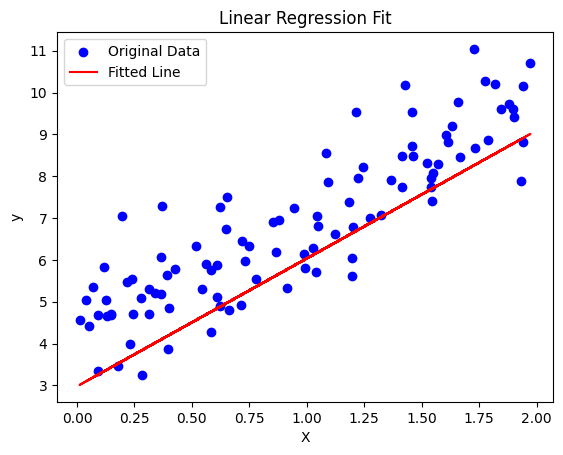

In [ ]:
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()